In [ ]:
#machine learning demonstration with linear regression
#need to import all of the files associated with coastline_marine_attr

In [ ]:
!pip install geopandas

In [2]:
import geopandas as gpd

In [4]:
coastline_shp = gpd.read_file("coastline_marine_attr.shp")

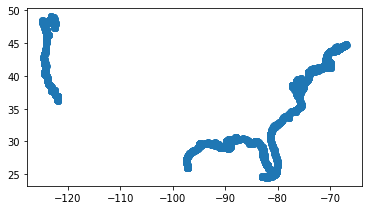

In [5]:
coastline_shp.plot()

In [6]:
coastline_shp.head()

,CID,salinity,srtm30,silicate,phosphate,nitrate,disso2,temp,geometry
0,1,36.1645,-13.54730,2.14787,0.085490,0.672583,4.73538,26.0314,POINT (-82.22100 24.50021)
1,1,35.8820,-5.29631,3.39048,0.081309,0.589654,4.82170,26.2659,POINT (-81.16694 25.14926)
2,1,28.2685,5.36795,4.50515,0.220880,1.225100,4.74903,23.2961,POINT (-90.58674 29.24938)
3,1,27.8134,-11.50460,2.30621,0.353542,2.226290,5.55894,14.3673,POINT (-76.05466 36.96940)
4,1,16.0193,-4.73809,2.47356,0.409711,2.607220,5.76708,13.9874,POINT (-76.38891 39.27398)


In [ ]:
#already well formulated data, will need to clean data like this for own project

In [7]:
#adds additional fields x and y
coastline_shp["x"] = coastline_shp["geometry"].x
coastline_shp["y"] = coastline_shp["geometry"].y
coastline_shp.head()

,CID,salinity,srtm30,silicate,phosphate,nitrate,disso2,temp,geometry,x,y
0,1,36.1645,-13.54730,2.14787,0.085490,0.672583,4.73538,26.0314,POINT (-82.22100 24.50021),-82.221000,24.500212
1,1,35.8820,-5.29631,3.39048,0.081309,0.589654,4.82170,26.2659,POINT (-81.16694 25.14926),-81.166938,25.149262
2,1,28.2685,5.36795,4.50515,0.220880,1.225100,4.74903,23.2961,POINT (-90.58674 29.24938),-90.586741,29.249380
3,1,27.8134,-11.50460,2.30621,0.353542,2.226290,5.55894,14.3673,POINT (-76.05466 36.96940),-76.054661,36.969399
4,1,16.0193,-4.73809,2.47356,0.409711,2.607220,5.76708,13.9874,POINT (-76.38891 39.27398),-76.388908,39.273977


In [8]:
#need to fix the random_state to a specific exapmle to get same result
#first code gets 80% of the data, the second gets the test data
training_data = coastline_shp.sample(frac=0.8, random_state=42)
test_data = coastline_shp.drop(training_data.index)

In [9]:
training_X = training_data[["salinity","srtm30","silicate","phosphate","disso2","temp","x","y"]]
training_Y = training_data["nitrate"]

In [ ]:
training_X.head()

In [11]:
test_X = test_data[["salinity","srtm30","silicate","phosphate","disso2","temp","x","y"]]
test_Y = test_data["nitrate"]

In [ ]:
test_X.head()

In [ ]:
#now the data is more prepared, but it needs to be standardized

In [14]:
#creating a z value function
def standardize_data (data, stats):
  return (data - stats['mean'])/stats['std']

In [ ]:
#creating the stats to test against
training_stats = training_X.describe().transpose()
training_stats

In [19]:
training_X_std = standardize_data(training_X, training_stats)

In [20]:
test_X_std = standardize_data(test_X, training_stats)
#need to do this with the training stats because we only "know" the stats for the training data

In [21]:
#training the model
from sklearn.linear_model import LinearRegression

In [22]:
linear_model = LinearRegression()
linear_model.fit(training_X_std, training_Y)

LinearRegression()

In [23]:
test_y_pred = linear_model.predict(test_X_std)

In [24]:
test_y_pred[0]

0.6816695058041904

In [25]:
test_Y[0:1]

1    0.589654
Name: nitrate, dtype: float64

In [26]:
import matplotlib.pyplot as plt


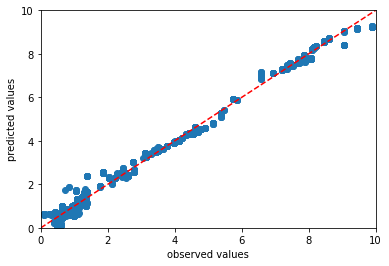

In [28]:
plt.scatter(test_Y, test_y_pred)
plt.xlabel("observed values")
plt.ylabel("predicted values")
plt.xlim([0,10])
plt.ylim([0,10])
plt.plot([0,10], [0,10], "r--")

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
rmse = mean_squared_error(test_Y, test_y_pred, squared=False)
rmse

0.22856738574157465

In [31]:
from scipy import stats

In [33]:
stats.pearsonr(test_Y, test_y_pred)

(0.9964267781327346, 0.0)

In [ ]:
#this data set is very good, in part because its a training dataset
#want all of the points to be clustered around the line
#the model should never see the test data

In [34]:
from sklearn.linear_model import Ridge

In [36]:
ridge_model = Ridge()
ridge_model.fit(training_X_std, training_Y)

Ridge()

In [ ]:
#can then run the ridge model through the same tests as the linear model above